In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import skimage.measure
from PIL import Image
import os
import shutil
import json
%matplotlib widget

In [2]:
binary_arr_list = []
count = 0
for filename in os.listdir("../png_crop"):
    number = filename[:4]
    input_path = '../png_crop/' + filename
    if filename[-3:] == 'png':
        image = skimage.io.imread(input_path)
        binary_list = []
        for i in range(len(image)):
            for j in range(len(image[i])):
                if image[i][j][3] == 0:
                    binary_list.append(0)   ### transparent: 0
                else:
                    binary_list.append(1)   ### color: 1
        binary_arr = np.reshape(binary_list, (image.shape[0], image.shape[1]))
        binary_arr_list.append([filename, binary_arr])
        count += 1
    if count % 100 == 0:
        print('Processed:', count)
print('Finish')

Processed: 100
Processed: 200
Processed: 300
Processed: 400
Processed: 500
Processed: 600
Processed: 700
Processed: 800
Processed: 900
Processed: 1000
Processed: 1100
Processed: 1200
Processed: 1300
Processed: 1400
Processed: 1500
Processed: 1600
Processed: 1700
Processed: 1800
Processed: 1900
Processed: 2000
Processed: 2100
Processed: 2200
Processed: 2300
Processed: 2400
Processed: 2500
Processed: 2600
Processed: 2700
Processed: 2800
Processed: 2900
Processed: 3000
Processed: 3100
Processed: 3200
Processed: 3300
Processed: 3400
Processed: 3500
Processed: 3600
Processed: 3700
Processed: 3800
Processed: 3900
Processed: 4000
Processed: 4100
Processed: 4200
Processed: 4300
Processed: 4400
Processed: 4500
Processed: 4600
Processed: 4700
Processed: 4800
Processed: 4900
Processed: 5000
Processed: 5100
Processed: 5200
Processed: 5300
Processed: 5400
Processed: 5500
Processed: 5600
Processed: 5700
Processed: 5800
Processed: 5900
Processed: 6000
Processed: 6100
Processed: 6200
Processed: 6300
P

In [3]:
binary_arr_csv = pd.DataFrame(binary_arr_list, columns = ['filename', 'binary_arr'])
binary_arr_csv.sort_values(by=['filename'], ascending=True, inplace=True)
binary_arr_csv.reset_index(drop=True, inplace=True)
# binary_arr_csv
# binary_arr_csv.to_pickle('seal_binary_arr.pkl')

### % of color area

In [2]:
# test = pd.read_pickle('seal_binary_arr.pkl')
# test

,filename,binary_arr
0,0000_蒋风白写生记.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0001_韦之.png,"[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0002_揆.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0003_塞北绕春.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0004_谭延闿印.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
9991,9995_抱石.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9992,9996_秋水亭.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9993,9997_徵明.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9994,9998_项.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [3]:
# test['x'] = test['binary_arr'].apply(lambda x: x.shape[0])
# test['y'] = test['binary_arr'].apply(lambda x: x.shape[1])
# test['size'] = test['x']*test['y']
# test['color_area'] = test['binary_arr'].apply(lambda x: sum(sum(x)))
# test['pct_color'] = test['color_area']/test['size']

In [6]:
# test

In [5]:
# test[['filename','x','y','size','color_area','pct_color']].to_csv('seal_pct_color.csv')

In [5]:
test = pd.read_csv('seal_pct_color.csv', index_col=0)
test

,filename,x,y,size,color_area,pct_color
0,0000_蒋风白写生记.png,500,496,248000,96013,0.387149
1,0001_韦之.png,740,529,391460,134905,0.344620
2,0002_揆.png,337,327,110199,38554,0.349858
3,0003_塞北绕春.png,592,582,344544,201401,0.584544
4,0004_谭延闿印.png,533,518,276094,126318,0.457518
...,...,...,...,...,...,...
9991,9995_抱石.png,373,193,71989,26715,0.371098
9992,9996_秋水亭.png,882,343,302526,85907,0.283966
9993,9997_徵明.png,493,238,117334,38647,0.329376
9994,9998_项.png,346,342,118332,30982,0.261823


<AxesSubplot:>

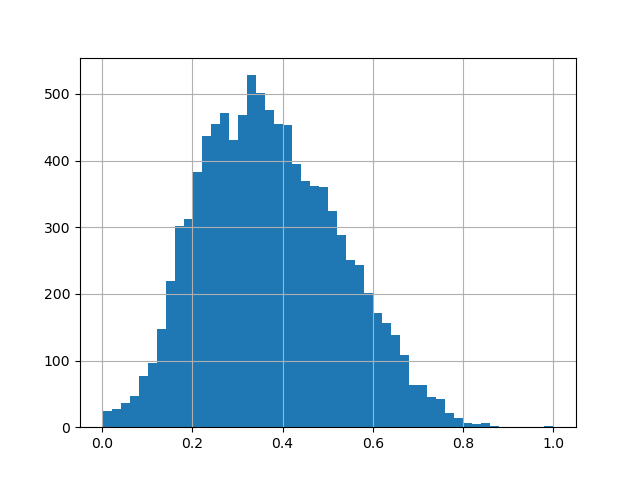

In [3]:
# test['pct_color'].hist(bins=50)

In [33]:
for fname in os.listdir("../classification/yinwen"):
    input_path = "../classification/yinwen/" + fname
    if fname[-3:] == 'png' and fname in test['filename'].unique().tolist():
        if float(test[test['filename']==fname]['pct_color']) > 0.4:    ### white_letter
            end_path = "../classification/yinwen/white_letter/" + fname
            shutil.move(input_path, end_path)
        if float(test[test['filename']==fname]['pct_color']) < 0.4:    ### red_letter
            end_path = "../classification/yinwen/red_letter/" + fname
            shutil.move(input_path, end_path)
print('finish')

finish


### Connected area
https://scipy-lectures.org/packages/scikit-image/auto_examples/plot_labels.html

### Step by step

In [ ]:
# load the image
image = skimage.io.imread("../png_crop/0010_八十岁应门者.png")
fig, ax = plt.subplots()
plt.imshow(image)

In [ ]:
# type(image), image.shape, image.shape[0]*image.shape[1], (image == [0]).sum()
# image[300]
# len(image[300])

In [ ]:
newData = []
for i in range(len(image)):
    for j in range(len(image[i])):
        if image[i][j][3] == 0:
            newData.append(0)   ### transparent: 0
        else:
            newData.append(1)   ### color: 1
sum(newData), len(newData), sum(newData)/len(newData)

In [ ]:
binary = np.reshape(newData, (image.shape[0], image.shape[1]))
plt.imshow(binary, cmap='gray')
plt.show()